# Classification de documents : prise en main des outils

Le but de ce TP est de classer des documents textuels... Dans un premier temps, nous allons vérifier le bon fonctionnement des outils sur des données jouets puis appliquer les concepts sur des données réelles.


## Conception de la chaine de traitement
Pour rappel, une chaine de traitement de documents classique est composée des étapes suivantes:
1. Lecture des données et importation
    - Dans le cadre de nos TP, nous faisons l'hypothèse que le corpus tient en mémoire... Si ce n'est pas le cas, il faut alors ajouter des structures de données avec des buffers (*data-reader*), bien plus complexes à mettre en place.
    - Le plus grand piège concerne l'encodage des données. Dans le TP... Pas (ou peu) de problème. Dans la vraie vie: il faut faire attention à toujours maitriser les formats d'entrée et de sortie.
1. Traitement des données brutes paramétrique. Chaque traitement doit être activable ou desactivable + paramétrable si besoin.
    - Enlever les informations *inutiles* : chiffre, ponctuations, majuscules, etc... <BR>
    **L'utilité dépend de l'application!**
    - Segmenter en mots (=*Tokenization*)
    - Elimination des stop-words
    - Stemming/lemmatisation (racinisation)
    - Byte-pair encoding pour trouver les mots composés (e.g. Sorbonne Université, Ville de Paris, Premier Ministre, etc...)
1. Traitement des données numériques
    - Normalisation *term-frequency* / binarisation
    - Normalisation *inverse document frequency*
    - Elimination des mots rares, des mots trop fréquents
    - Construction de critère de séparabilité pour éliminer des mots etc...
1. Apprentissage d'un classifieur
    - Choix du type de classifieur
    - Réglage des paramètres du classifieur (régularisation, etc...)

## Exploitation de la chaine de traitement

On appelle cette étape la réalisation d'une campagne d'expériences: c'est le point clé que nous voulons traviller en TAL cette année.
1. Il est impossible de tester toutes les combinaisons par rapport aux propositions ci-dessus... Il faut donc en éliminer un certain nombre.
    - En discutant avec les experts métiers
    - En faisant des tests préliminaires
1. Après ce premier filtrage, il faut:
    - Choisir une évaluation fiable et pas trop lente (validation croisée, leave-one-out, split apprentissage/test simple)
    - Lancer des expériences en grand
        - = *grid-search*
        - parallèliser sur plusieurs machines
        - savoir lancer sur un serveur et se déconnecter
1. Collecter et analyser les résultats


## Inférence

L'inférence est ensuite très classique: la chaine de traitement optimale est apte à traiter de nouveaux documents

# Etape 1: charger les données

In [103]:
import numpy as np
import matplotlib.pyplot as plt

import codecs
import re
import os.path

In [104]:
def load_movies(path2data): # 1 classe par répertoire
    alltxts = [] # init vide
    labs = []
    cpt = 0
    for cl in os.listdir(path2data): # parcours des fichiers d'un répertoire
        for f in os.listdir(path2data+cl):
            txt = open(path2data+cl+'/'+f).read()
            alltxts.append(txt)
            labs.append(cpt)
        cpt+=1 # chg répertoire = cht classe
        
    return alltxts,labs


In [105]:
path = "/Users/antoinedegenne/Desktop/PAPT/3A/Web_semantique/Vincent/tuto_TAL-main-3/notebooks/ressources/movies/movies1000/"

alltxts,alllabs = load_movies(path)

In [106]:
#print(len(alltxts),len(alllabs))
print(alltxts[0])
#print(alllabs[0])
#print(alltxts[-1])
#print(alllabs[0])

bad . bad . 
bad . 
that one word seems to pretty much sums up beyond the valley of the dolls . 
if that summary isn't enough for you , how about t&a , t&a , t&a ? 
still haven't got the point ? 
other than director russ meyer's predilection for casting attractive large breasted women who ultimately expose the afore-mentioned anatomical areas , there is really only one other reason to recommend even taking a look at this movie . 
that is the fact that it was co-written by famed film critic roger ebert , who also was responsible for the screenplay . 
after watching this movie you will never be able to sit through another one of his reviews where he gives a movie a thumbs down for bad writing with a straight face . 
this movie stinks out loud . 
quite frankly , this movie deserves a . 
but there are parts of it that are so bad they are almost funny . 
so i'm giving it a . 
and maybe that is too generous . 
right from the opening credits , i knew that i had a class-a bomb on my hands . 
n

# Transformation paramétrique du texte

Vous devez tester, par exemple, les cas suivants:
- transformation en minuscule ou pas
- suppression de la ponctuation
- transformation des mots entièrement en majuscule en marqueurs spécifiques
- suppression des chiffres ou pas
- conservation d'une partie du texte seulement (seulement la première ligne = titre, seulement la dernière ligne = résumé, ...)
- stemming
- ...


Vérifier systématiquement sur un exemple ou deux le bon fonctionnement des méthodes sur deux documents (au moins un de chaque classe).

In [109]:
#Suppression de la ponctuation
import string

punc = string.punctuation  
punc += '\n\r\t'
alltxts = [ txt.translate(str.maketrans(punc, ' ' * len(punc))) for txt in alltxts ]
print(alltxts[0])


bad   bad    bad    that one word seems to pretty much sums up beyond the valley of the dolls    if that summary isn t enough for you   how about t a   t a   t a    still haven t got the point    other than director russ meyer s predilection for casting attractive large breasted women who ultimately expose the afore mentioned anatomical areas   there is really only one other reason to recommend even taking a look at this movie    that is the fact that it was co written by famed film critic roger ebert   who also was responsible for the screenplay    after watching this movie you will never be able to sit through another one of his reviews where he gives a movie a thumbs down for bad writing with a straight face    this movie stinks out loud    quite frankly   this movie deserves a    but there are parts of it that are so bad they are almost funny    so i m giving it a    and maybe that is too generous    right from the opening credits   i knew that i had a class a bomb on my hands    n

In [102]:
# suppress accent and all non normalized char
import unicodedata

alltxts = [unicodedata.normalize('NFD', txt).encode('ascii', 'ignore').decode("utf-8") for txt in alltxts]
alltxts = [ txt.lower() for txt in alltxts ]

print(alltxts[0])

bad   bad    bad    that one word seems to pretty much sums up beyond the valley of the dolls    if that summary isn t enough for you   how about t a   t a   t a    still haven t got the point    other than director russ meyer s predilection for casting attractive large breasted women who ultimately expose the afore mentioned anatomical areas   there is really only one other reason to recommend even taking a look at this movie    that is the fact that it was co written by famed film critic roger ebert   who also was responsible for the screenplay    after watching this movie you will never be able to sit through another one of his reviews where he gives a movie a thumbs down for bad writing with a straight face    this movie stinks out loud    quite frankly   this movie deserves a    but there are parts of it that are so bad they are almost funny    so i m giving it a    and maybe that is too generous    right from the opening credits   i knew that i had a class a bomb on my hands    n

In [93]:
#Suppression chiffre
import re

alltxts = [ re.sub('[0-9]+', '', txt) for txt in alltxts ]
print(alltxts[0])

bad   bad    bad    that one word seems to pretty much sums up beyond the valley of the dolls    if that summary isn t enough for you   how about t a   t a   t a    still haven t got the point    other than director russ meyer s predilection for casting attractive large breasted women who ultimately expose the afore mentioned anatomical areas   there is really only one other reason to recommend even taking a look at this movie    that is the fact that it was co written by famed film critic roger ebert   who also was responsible for the screenplay    after watching this movie you will never be able to sit through another one of his reviews where he gives a movie a thumbs down for bad writing with a straight face    this movie stinks out loud    quite frankly   this movie deserves a    but there are parts of it that are so bad they are almost funny    so i m giving it a    and maybe that is too generous    right from the opening credits   i knew that i had a class a bomb on my hands    n

In [7]:
#Séparation données train et test 
from sklearn.model_selection import train_test_split
alltxts_train, alltxts_test, alllabs_train, alllabs_test = train_test_split(alltxts, alllabs, test_size=0.33, random_state=0)

# Extraction du vocabulaire

Exploration préliminaire des jeux de données.

- Quelle est la taille d'origine du vocabulaire?
- Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
- Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
- Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
- Quelle est la distribution d'apparition des mots (Zipf)
- Quels sont les 100 bigrammes/trigrammes les plus fréquents?


[('', 323735), ('the', 51120), ('a', 25643), ('and', 23994), ('of', 23006), ('to', 21215), ('is', 16810), ('in', 14560), ('s', 12890), ('it', 10735), ('that', 10498), ('as', 7525), ('with', 7269), ('for', 6649), ('his', 6408), ('film', 6372), ('this', 6354), ('i', 5974), ('he', 5825), ('but', 5798)]


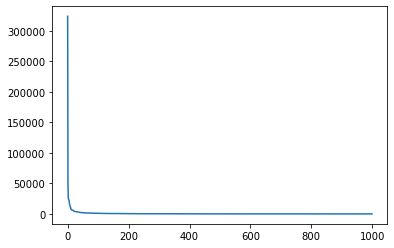

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

wc = Counter()
for text in alltxts_train:
    wc.update(text.split(" "))
    
freq = [f for w,f in wc.most_common(1000)]

plt.plot(freq[:1000])
print(wc.most_common(20))

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(alltxts_train)
print(vectorizer.get_feature_names()[:50])
print(len(vectorizer.get_feature_names()))

['aa', 'aaa', 'aaaaaaaahhhh', 'aaaahhhs', 'aahs', 'aaliyah', 'aamir', 'aardman', 'aaron', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abating', 'abba', 'abberation', 'abberline', 'abbots', 'abbott', 'abbotts', 'abby', 'abc', 'abdomen', 'abducted', 'abductees', 'abduction', 'abductions', 'abdul', 'abe', 'abel', 'aberdeen', 'aberration', 'abetted', 'abetting', 'abeyance', 'abhorrence', 'abhorrent', 'abider', 'abides', 'abiding', 'abigail', 'abiility', 'abilities', 'ability', 'abject', 'ablaze', 'able', 'ably']
33362


/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, alllabs_train)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1,max_iter=1000)
lr_clf.fit(X, alllabs_train)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, alllabs_train)

X_test = vectorizer.transform(alltxts_test)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)


print(f"Naïve Bayes accuracy: {accuracy_score(alllabs_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(alllabs_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(alllabs_test, pred_svm)}")

Naïve Bayes accuracy: 0.8151515151515152
Logistic Regression accuracy: 0.8151515151515152
SVM accuracy: 0.8121212121212121


In [37]:
#Get stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stops = set(stopwords.words('english'))
print(stops)



{'these', 'up', 'only', 'how', 'doesn', 'wouldn', 'than', 'been', "wasn't", 'himself', 'our', 'i', 'am', 'down', 'will', "aren't", "you're", 'under', 'its', 'should', 'having', 'to', 'here', 'then', 'mightn', 'those', 'does', 'he', 'very', 'off', 'shouldn', 'they', 'is', 'if', 'before', 'hasn', "shouldn't", 'between', "you'll", 'this', 'just', 'at', 'most', 'you', 'from', 'a', 't', 'wasn', 'until', 'him', 'against', 'on', 'after', 'won', 'don', 'was', 'once', 'hadn', 'few', 'were', 'not', 'of', 'needn', 'through', 'shan', 'she', 'as', 'which', 're', 'for', "needn't", "couldn't", 'being', 'why', 'there', 'can', 'now', "you'd", 'yours', 'aren', 'mustn', 'doing', "mightn't", 'themselves', 'again', 'her', 'didn', 'are', 'their', 'couldn', "you've", 'has', "shan't", 'do', 'same', "doesn't", 'above', 'both', 'what', 'theirs', 'ain', "hasn't", 'itself', 'them', 'ourselves', 'yourselves', 'yourself', 'it', 'your', 'we', 'own', 'did', 'when', 'such', 'me', 'be', "didn't", "don't", 'into', 'm', 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoinedegenne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:

vectorizer = CountVectorizer(stop_words=stops)
X = vectorizer.fit_transform(alltxts_train)
print(vectorizer.get_feature_names()[:50])

['aa', 'aaa', 'aaaaaaaahhhh', 'aaaahhhs', 'aahs', 'aaliyah', 'aamir', 'aardman', 'aaron', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abating', 'abba', 'abberation', 'abberline', 'abbots', 'abbott', 'abbotts', 'abby', 'abc', 'abdomen', 'abducted', 'abductees', 'abduction', 'abductions', 'abdul', 'abe', 'abel', 'aberdeen', 'aberration', 'abetted', 'abetting', 'abeyance', 'abhorrence', 'abhorrent', 'abider', 'abides', 'abiding', 'abigail', 'abiility', 'abilities', 'ability', 'abject', 'ablaze', 'able', 'ably']


/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, alllabs_train)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1,max_iter=1000)
lr_clf.fit(X, alllabs_train)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, alllabs_train)

X_test = vectorizer.transform(alltxts_test)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)


print(f"Naïve Bayes accuracy: {accuracy_score(alllabs_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(alllabs_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(alllabs_test, pred_svm)}")

Naïve Bayes accuracy: 0.8121212121212121
Logistic Regression accuracy: 0.8106060606060606
SVM accuracy: 0.8045454545454546


In [40]:

vectorizer = CountVectorizer(stop_words=stops,ngram_range=(2,2),analyzer='word')
X = vectorizer.fit_transform(alltxts_train)
print(vectorizer.get_feature_names()[:50])

/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa meetings', 'aaa minor', 'aaa team', 'aaaaaaaahhhh plot', 'aaaahhhs wows', 'aahs pixar', 'aaliyah impressive', 'aamir khan', 'aardman animation', 'aaron convincing', 'aaron determined', 'aaron eckhart', 'aaron edward', 'aaron gets', 'aaron moor', 'aaron schneider', 'aaron steve', 'aaron williams', 'aback honesty', 'aback unusual', 'abandon alien', 'abandon conviction', 'abandon creation', 'abandon depth', 'abandon farm', 'abandon figured', 'abandon film', 'abandon much', 'abandon naturally', 'abandon preview', 'abandon principle', 'abandon rejecting', 'abandon ship', 'abandon sure', 'abandon unique', 'abandoned adopted', 'abandoned air', 'abandoned alone', 'abandoned altar', 'abandoned beaten', 'abandoned boredom', 'abandoned building', 'abandoned buildings', 'abandoned child', 'abandoned church', 'abandoned cruiser', 'abandoned danvers', 'abandoned father', 'abandoned girlfriend', 'abandoned highway']


In [41]:

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, alllabs_train)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1,max_iter=1000)
lr_clf.fit(X, alllabs_train)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, alllabs_train)

X_test = vectorizer.transform(alltxts_test)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)


print(f"Naïve Bayes accuracy: {accuracy_score(alllabs_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(alllabs_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(alllabs_test, pred_svm)}")

Naïve Bayes accuracy: 0.7803030303030303
Logistic Regression accuracy: 0.7575757575757576
SVM accuracy: 0.7545454545454545


Question qui devient de plus en plus intéressante avec les approches modernes:
est-il possible d'extraire des tri-grammes de lettres pour représenter nos documents?

Quelle performances attendrent? Quels sont les avantages et les inconvénients d'une telle approche?

In [42]:

vectorizer = CountVectorizer(stop_words=stops,ngram_range=(3,3),analyzer='char')
X = vectorizer.fit_transform(alltxts_train)
print(vectorizer.get_feature_names()[:50])

['\x05\x05e', '\x05 h', '\x05 t', '\x05eu', '\x05wh', '\x12 u', '\x12ll', '\x12m ', '\x12re', '\x12s ', '\x12t ', '\x13ea', '\x13go', '\x13if', '\x13ri', '\x13su', '\x13th', '\x13wh', '\x14 a', '\x14 h', '\x14 i', '\x14 l', '\x14 t', '\x14 w', '\x16 a', '\x16 b', '\x16 d', '\x16 p', '\x16 r', '\x16 t', ' \x05 ', ' \x13e', ' \x13g', ' \x13i', ' \x13r', ' \x13s', ' \x13t', ' \x13w', ' \x14 ', ' \x16 ', ' a ', ' aa', ' ab', ' ac', ' ad', ' ae', ' af', ' ag', ' ah', ' ai', ' aj', ' ak', ' al', ' am', ' an', ' ao', ' ap', ' aq', ' ar', ' as', ' at', ' au', ' av', ' aw', ' ax', ' ay', ' az', ' b ', ' ba', ' bb', ' be', ' bi', ' bl', ' bm', ' bo', ' bp', ' br', ' bs', ' bt', ' bu', ' by', ' c ', ' ca', ' cb', ' cd', ' ce', ' cg', ' ch', ' ci', ' ck', ' cl', ' cm', ' cn', ' co', ' cp', ' cr', ' cs', ' cu', ' cy', ' cz', ' d ', ' da', ' dc', ' de', ' dg', ' dh', ' di', ' dj', ' dl', ' dm', ' dn', ' do', ' dr', ' dt', ' du', ' dv', ' dw', ' dy', ' dz', ' e ', ' ea', ' eb', ' ec', ' ed', ' ee', '

/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, alllabs_train)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1,max_iter=1000)
lr_clf.fit(X, alllabs_train)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, alllabs_train)

X_test = vectorizer.transform(alltxts_test)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)


print(f"Naïve Bayes accuracy: {accuracy_score(alllabs_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(alllabs_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(alllabs_test, pred_svm)}")

/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Naïve Bayes accuracy: 0.753030303030303
Logistic Regression accuracy: 0.7636363636363637
SVM accuracy: 0.7515151515151515


In [75]:
vectorizer = CountVectorizer(max_df=1000000,min_df=1,max_features=500) #try out some values
X = vectorizer.fit_transform(alltxts_train)
print(vectorizer.get_feature_names()[:50])

['able', 'about', 'acting', 'action', 'actor', 'actors', 'actually', 'after', 'again', 'against', 'alien', 'all', 'almost', 'along', 'already', 'also', 'although', 'always', 'american', 'an', 'and', 'another', 'any', 'anyone', 'anything', 'are', 'around', 'as', 'at', 'attempt', 'audience', 'away', 'back', 'bad', 'based', 'be', 'beautiful', 'because', 'become', 'becomes', 'been', 'before', 'begins', 'behind', 'being', 'believe', 'best', 'better', 'between', 'big']


/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X, alllabs_train)


#Logistic Regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1,max_iter=1000)
lr_clf.fit(X, alllabs_train)

#Linear SVM
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X, alllabs_train)

X_test = vectorizer.transform(alltxts_test)

pred_nb = nb_clf.predict(X_test)
pred_lr = lr_clf.predict(X_test)
pred_svm = svm_clf.predict(X_test)


print(f"Naïve Bayes accuracy: {accuracy_score(alllabs_test, pred_nb)}")
print(f"Logistic Regression accuracy: {accuracy_score(alllabs_test, pred_lr)}")
print(f"SVM accuracy: {accuracy_score(alllabs_test, pred_svm)}")

/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Naïve Bayes accuracy: 0.746969696969697
Logistic Regression accuracy: 0.7484848484848485
SVM accuracy: 0.740909090909091


In [80]:
svm = []
for k in range(1,10000,100):
    print(k)
    vectorizer = CountVectorizer(max_df=1000000,min_df=1,max_features=k) #try out some values
    X = vectorizer.fit_transform(alltxts_train)
    svm_clf = LinearSVC(random_state=0, tol=1e-5)
    svm_clf.fit(X, alllabs_train)
    X_test = vectorizer.transform(alltxts_test)
    pred_svm = svm_clf.predict(X_test)
    svm.append(accuracy_score(alllabs_test, pred_svm))

/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/antoinedegenne/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/antoinedegenne/opt/anaconda3

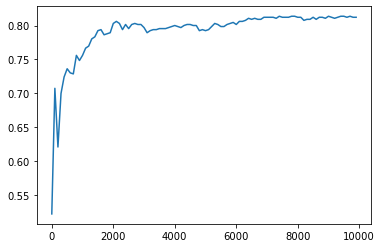

In [82]:
plt.plot(range(1,10000,100),svm)

# Modèles de Machine Learning

Avant de lancer de grandes expériences, il faut se construire une base de travail solide en étudiant les questions suivantes:

- Combien de temps ça prend d'apprendre un classifieur NB/SVM/RegLog sur ces données en fonction de la taille du vocabulaire?
- La validation croisée est-elle nécessaire? Est ce qu'on obtient les mêmes résultats avec un simple *split*?
- La validation croisée est-elle stable? A partir de combien de fold (travailler avec différentes graines aléatoires et faire des statistiques basiques)?

## Première campagne d'expériences

Les techniques sur lesquelles nous travaillons étant sujettes au sur-apprentissage: trouver le paramètre de régularisation dans la documentation et optimiser ce paramètre au sens de la métrique qui vous semble la plus appropriée (cf question précédente).

## Equilibrage des données

Un problème reconnu comme dur dans la communauté est celui de l'équilibrage des classes (*balance* en anglais). Que faire si les données sont à 80, 90 ou 99% dans une des classes?
Le problème est dur mais fréquent; les solutions sont multiples mais on peut isoler 3 grandes familles de solution.

1. Ré-équilibrer le jeu de données: supprimer des données dans la classe majoritaire et/ou sur-échantilloner la classe minoritaire.<BR>
   $\Rightarrow$ A vous de jouer pour cette technique
1. Changer la formulation de la fonction de coût pour pénaliser plus les erreurs dans la classe minoritaire:
soit une fonction $\Delta$ mesurant les écarts entre $f(x_i)$ et $y_i$ 
$$C = \sum_i  \alpha_i \Delta(f(x_i),y_i), \qquad \alpha_i = \left\{
\begin{array}{ll}
1 & \text{si } y_i \in \text{classe majoritaire}\\
B>1 & \text{si } y_i \in \text{classe minoritaire}\\
\end{array} \right.$$
<BR>
   $\Rightarrow$ Les SVM et d'autres approches sklearn possèdent des arguments pour régler $B$ ou $1/B$... Ces arguments sont utiles mais pas toujours suffisant.
1. Courbe ROC et modification du biais. Une fois la fonction $\hat y = f(x)$ apprise, il est possible de la *bidouiller* a posteriori: si toutes les prédictions $\hat y$ sont dans une classe, on va introduire $b$ dans $\hat y = f(x) + b$ et le faire varier jusqu'à ce qu'un des points change de classe. On peut ensuite aller de plus en plus loin.
Le calcul de l'ensemble des scores associés à cette approche mène directement à la courbe ROC.

**Note:** certains classifieurs sont intrinsèquement plus résistante au problème d'équilibrage, c'est par exemple le cas des techniques de gradient boosting que vous verrez l'an prochain.